#  Import Libraries 

#### Let us import the required libraries and functions

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

#  Loading the dataset
#### Read and display data to get insights from the data

In [2]:
data=pd.read_csv(r"C:\Users\induj\Downloads\salarydata.csv") # reading the dataset
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#  Checking the Basic details of Dataset

In [3]:
data.shape

(32561, 14)

In [4]:
data.isin(['?']).sum() # dataset contains meaningless values of '?' in certain columns

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [5]:
data = data.replace(to_replace='?', value=np.nan) # replacing fields having '?' with null values

In [6]:
# Making sure that the data does not contain unecessary spaces.
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [7]:
# converting the target column into numerical classes (values of either 0 or 1).
data['salary'] = data['salary'].replace({'<=50K':0,'>50K':1})

In [8]:
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

,Unique Values
age,73
workclass,8
education,16
education-num,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2
capital-gain,119


#  Data Preprocessing

### Handling Missing Values

In [9]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [10]:
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486
age,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000
sex,0,0.000000


In [11]:
# numeric features
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [12]:
# categoric features
categoric_features = data.select_dtypes(include='object')
categoric_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [13]:
# filling missing values
msv_col = ['workclass','occupation','native-country']
for col in msv_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [14]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [15]:
# education & education number column are just the same, so dropping education number column.
data.drop(labels='education-num', axis=1, inplace=True)

In [16]:
# Transforming Maritial Status column with value as either married or not married.
data = data.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

# Exploratory Data Analysis

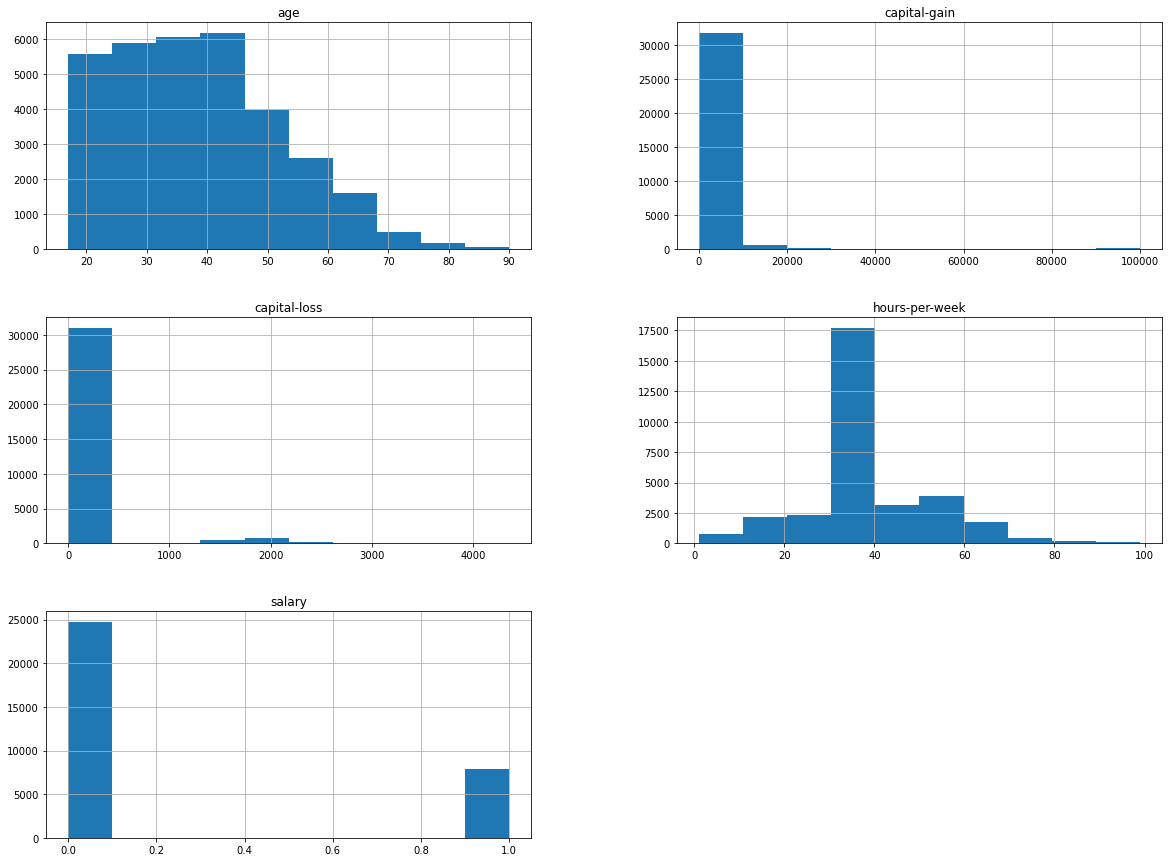

In [17]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

Text(23.610286458333334, 0.5, 'count')

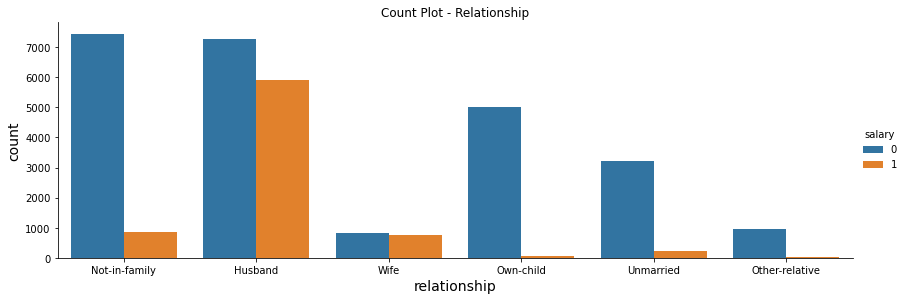

In [18]:
sns.catplot(x='relationship', data=data, kind='count', hue="salary", palette= 'tab10',  height=4, aspect=3)
plt.title('Count Plot - Relationship')
plt.xlabel('relationship', fontsize=14)
plt.ylabel('count', fontsize=14)


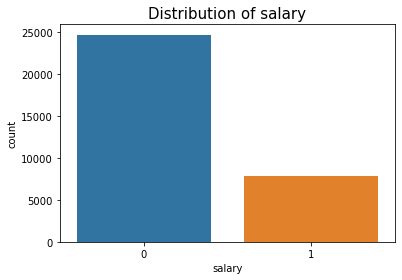

In [19]:
# Checking label counts
sns.countplot(x='salary', data=data)
plt.title("Distribution of salary", fontsize = 15)
plt.show()

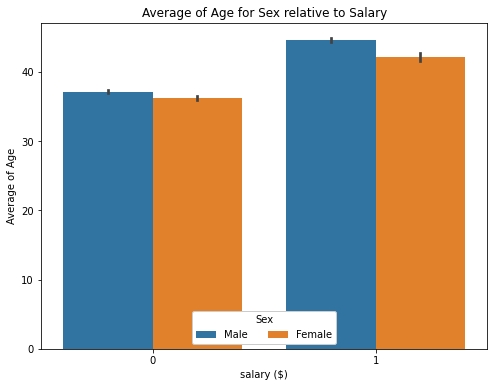

In [20]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = data, x = 'salary', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Salary')
plt.xlabel('salary ($)')
plt.ylabel('Average of Age');

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of salary, we see that the male category has a little bit greater age average than the female category.

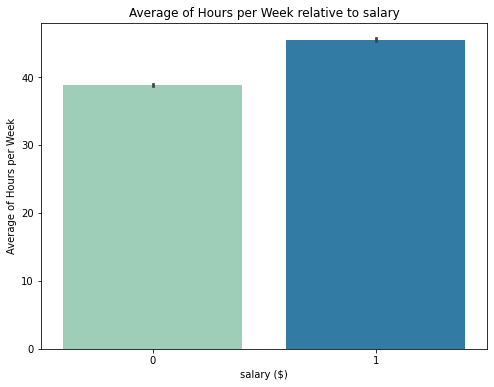

In [21]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(data=data, x='salary', y='hours-per-week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to salary')
plt.xlabel('salary ($)')
plt.ylabel('Average of Hours per Week');

We notice here that the salary grows directly with the average of work hours per week, which is a pretty reasonable and logical result

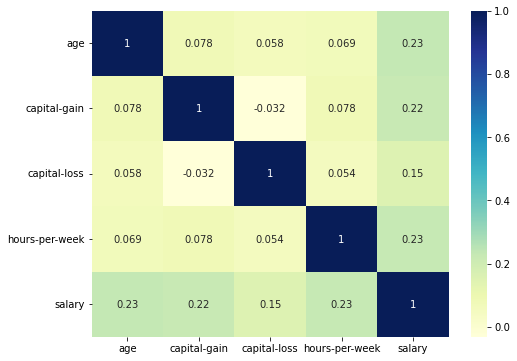

In [22]:
# Correlation plot showing the correlation between continuous features and the target label
plt.figure(figsize=(8,6))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

Text(10.050000000000004, 0.5, 'age')

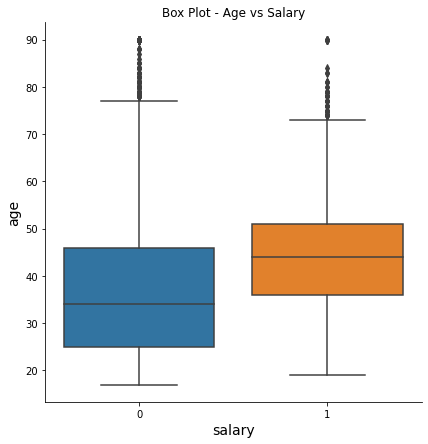

In [23]:
sns.catplot(data=data, x="salary", y="age", kind="box", palette= 'tab10',height=6, aspect=1)
plt.title('Box Plot - Age vs Salary')
plt.xlabel('salary', fontsize=14)
plt.ylabel('age', fontsize=14)

## Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
column = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()

In [25]:
for col in column:
    data[col] = le.fit_transform(data[col])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,2174,0,40,38,0
1,50,5,9,0,3,0,4,1,0,0,13,38,0
2,38,3,11,1,5,1,4,1,0,0,40,38,0
3,53,3,1,0,5,0,2,1,0,0,40,38,0
4,28,3,9,0,9,5,2,0,0,0,40,4,0


In [26]:
data


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,2174,0,40,38,0
1,50,5,9,0,3,0,4,1,0,0,13,38,0
2,38,3,11,1,5,1,4,1,0,0,40,38,0
3,53,3,1,0,5,0,2,1,0,0,40,38,0
4,28,3,9,0,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,0,12,5,4,0,0,0,38,38,0
32557,40,3,11,0,6,0,4,1,0,0,40,38,1
32558,58,3,11,1,0,4,4,0,0,0,40,38,0
32559,22,3,11,1,0,3,4,1,0,0,20,38,0


In [27]:
data.drop(['capital-gain','capital-loss'],axis=1,inplace=True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,40,38,0
1,50,5,9,0,3,0,4,1,13,38,0
2,38,3,11,1,5,1,4,1,40,38,0
3,53,3,1,0,5,0,2,1,40,38,0
4,28,3,9,0,9,5,2,0,40,4,0


###  Splitting into Target & Feature

In [28]:
X=data.drop('salary',axis=1)
y=data['salary']

## Standard Scaling

In [29]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age',  'hours-per-week']])
input_scaled = scaler.transform(X[['age',  'hours-per-week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age',  'hours-per-week'])

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Modelling

## Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
#Defining Logistic Regression Model & fitting train data
lr=LogisticRegression()
logit_model=lr.fit(X_train,y_train)
#Predicting the result of test data using obtained model
y_pred_logit=logit_model.predict(X_test)

In [33]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
precision_score(y_test,y_pred_logit)

0.58

In [34]:
accuracy_score(y_test,y_pred_logit)

0.7796714263780132

In [35]:
X=data.drop('salary',axis=1)
y=data['salary']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

## Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_dt)

0.7784431137724551

## Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_rf)

0.8205128205128205

## Lazy Predict

In [41]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
## fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:26<00:00,  2.98s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.84               0.76     0.76      0.84   
XGBClassifier                      0.84               0.75     0.75      0.84   
QuadraticDiscriminantAnalysis      0.76               0.75     0.75      0.77   
AdaBoostClassifier                 0.84               0.75     0.75      0.83   
RandomForestClassifier             0.82               0.73     0.73      0.81   
NearestCentroid                    0.71               0.73     0.73      0.73   
GaussianNB                         0.75               0.73     0.73      0.77   
LabelSpreading                     0.80               0.73     0.73      0.80   
KNeighborsClassifier               0.81               0.73     0.73      0.81   
LabelPropagation                   0.80               0.73     0.73      0.80   
ExtraTreesClassifier        

## XGBClassifier

In [42]:
# fit model no training data
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [44]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [45]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.99%


## SVM Model - RBF

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy on training data is: 0.7678900491400491
Accuracy is: 0.8398587440503608
Precision is: 0.8332476648047339
Recall is: 0.8398587440503608
f1 score is: 0.8350683788168878


In [47]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',77.95],['Decision tree',77.64],['Random Forest',82.02],['XGB Classifier',83.99],['SVM',83.98]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      77.95 │
├─────────────────────┼────────────┤
│ Decision tree       │      77.64 │
├─────────────────────┼────────────┤
│ Random Forest       │      82.02 │
├─────────────────────┼────────────┤
│ XGB Classifier      │      83.99 │
├─────────────────────┼────────────┤
│ SVM                 │      83.98 │
╘═════════════════════╧════════════╛


## Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
param_grid = {'C': [1,10,100,1000]}
# Instantiating logistic regression classifier
logreg = LogisticRegression()
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
logreg_cv.predict(X_test)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.7775258973377319


In [49]:
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

age              28.15
hours-per-week   14.04
education        13.58
occupation       11.57
marital-status   10.19
relationship      9.79
workclass         6.33
native-country    2.47
race              2.32
sex               1.56
dtype: float64

In [50]:
param_grid = { 
    'n_estimators': [5,10,20],
    'max_depth' : [10,15,20],
    'criterion' :['gini', 'entropy']
}

In [51]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}

In [52]:
rft = RandomForestClassifier(n_estimators=10,max_depth=10,random_state=42,criterion='entropy')
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=42)

In [53]:
y_pred=rft.predict(X_test)
accuracy_score(y_test,y_pred)

0.8366344234607708

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4942
           1       0.69      0.58      0.63      1571

    accuracy                           0.84      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [55]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',77.7],['Random Forest',83.66]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      77.7  │
├─────────────────────┼────────────┤
│ Random Forest       │      83.66 │
╘═════════════════════╧════════════╛


In [56]:
X

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,9,1,0,1,4,1,40,38
1,50,5,9,0,3,0,4,1,13,38
2,38,3,11,1,5,1,4,1,40,38
3,53,3,1,0,5,0,2,1,40,38
4,28,3,9,0,9,5,2,0,40,4
...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,0,12,5,4,0,38,38
32557,40,3,11,0,6,0,4,1,40,38
32558,58,3,11,1,0,4,4,0,40,38
32559,22,3,11,1,0,3,4,1,20,38


In [57]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [58]:
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X=np.array(X)

In [59]:
y=data['salary'].values
y=np.array(y)

In [60]:
import pickle
filename = 'salary_pred_model.pkl'
pickle.dump(rft,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))